<a href="https://colab.research.google.com/github/SebastianCanizales/SebastianCan/blob/main/Ej_Tecnicas_Mineria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRACTICA TECNICAS DE MINERIA**

MIERCOLES 7-10PM  

**EQUIPO 5**

1798584 Martinez Cervantes Mara Anahi

1799830 Ortiz Martinez Katia del Carmen

1821636 Aviles Zuniga Lluvia Elizabeth

1842108 Canizales Melchor Sebastian

**TITULO DE LA BASE DE DATOS**

Nombre y URL con el que se encuentra :
*   Customer Personality Analysis
*   https://www.kaggle.com/imakash3011/customer-personality-analysis







**INTRODUCCIÓN GENERAL**

El análisis de personalidad del cliente es un análisis detallado de los clientes ideales de una empresa. Ayuda a una empresa a comprender mejor a sus clientes y les facilita la modificación de productos de acuerdo con las necesidades, comportamientos e inquietudes específicas de los diferentes tipos de clientes.

El análisis de la personalidad del cliente ayuda a una empresa a modificar su producto en función de sus clientes objetivo de diferentes tipos de segmentos de clientes. Por ejemplo, en lugar de gastar dinero para comercializar un nuevo producto para cada cliente en la base de datos de la empresa, una empresa puede analizar qué segmento de clientes es más probable que compre el producto y luego comercializar el producto solo en ese segmento en particular.

**DESCRIPCIÓN DE LOS DATOS**

**Age:** Edad en años.  
**Anaemia:** Disminución de glóbulos rojos o hemoglobina (booleano).  
**Creatinine_phosphokinase:** Nivel de la enzima CPK en sangre (mcg / L).  
**Diabetes:** Si el paciente tiene diabetes.  
**Ejection_fraction:** Porcentaje de sangre que sale del corazón en cada contracción (porcentaje).  
**High_blood_pressure:** Si el paciente tiene hipertensión (booleana).  
**Platelets:** Plaquetas en la sangre (kiloplaquetas / mL).  
**Serum_creatinine:** Nivel de creatinina sérica en sangre (mg / dL).  
**Serum_sodium:** Nivel de sodio sérico en sangre (mEq / L).  
**Sex:** Género de la persona.  (1 es hombre y 0 es mujer)  
**Smoking:** Si el paciente es fumador activo o no.  
**Time:** Tiempo en días que el paciente está en observación.  
**DEATH_EVENT:** Si el paciente falleció en el periodo de observación se denota por el número 1, si el paciente sigue vivo durante el periodo de observación se denota por el número 2.

**JUSTIFICACIÓN DE LOS DATOS**  
Las enfermedades cardiovasculares (ECV) son la principal causa de muerte a nivel mundial, cobrando un estimado de 17,9 millones de vidas cada año, lo que representa el 31% de todas las muertes en todo el mundo. La insuficiencia cardíaca es un evento común causado por las enfermedades cardiovasculares y este conjunto de datos contiene 12 características que pueden usarse para predecir la mortalidad por insuficiencia cardíaca.

La mayoría de las enfermedades cardiovasculares se pueden prevenir abordando los factores de riesgo conductuales como el consumo de tabaco, la dieta poco saludable y la obesidad, la inactividad física y el consumo nocivo de alcohol mediante estrategias de población.

Las personas con enfermedad cardiovascular o que se encuentran en alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida) necesitan una detección y manejo precoces donde un modelo de aprendizaje automático puede ser de gran ayuda.

**OBJETIVO**  
Lograr pronosticar de mejor manera la futura salud de un cierto paciente inicial a cualquier tipo de enfermedad que se vea reflajada dentro de la base de datos.



**PREGUNTAS DE INTERÉS** 

- *¿Qué tanto afecta el ser fumador?* 
- *Al padecer diabetes, ¿mueren más hombres que mujeres por alguna enfermedad cardiovascular?*

**PARTE DE  LA PROGRAMACIÓN**

*IMPORTAR LA BASE DE DATOS Y LAS LIBRERIAS A USAR*

In [ ]:
import pandas as pd
import numpy as np
import json
#gráficas
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
#árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

datosh = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [ ]:
a = datosh.shape
b = datosh.columns
c = datosh.isnull().sum()

print("Esta base de datos es de:",a)
print(" ")
print("La base de datos tiene columnas llamadas:\n")
print(b)
print(" ")
print("Evidencia de que hay o no hay numeros nulos:\n")
print(c)

Esta base de datos es de: (299, 13)
 
La base de datos tiene columnas llamadas:

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
 
Evidencia de que hay o no hay numeros nulos:

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


*Tipo de datos en cada columna*

In [ ]:
datosh.dtypes


age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

*ORGANIZACIÓN DE LOS DATOS*

In [ ]:
dcnew=datosh.drop(['ejection_fraction','platelets','serum_creatinine','serum_sodium','creatinine_phosphokinase'],axis=1)
print(dcnew)
#Decidimos dejar lo que consideramos importante para nuestro analisis

      age  anaemia  diabetes  ...  smoking  time  DEATH_EVENT
0    75.0        0         0  ...        0     4            1
1    55.0        0         0  ...        0     6            1
2    65.0        0         0  ...        1     7            1
3    50.0        1         0  ...        0     7            1
4    65.0        1         1  ...        0     8            1
..    ...      ...       ...  ...      ...   ...          ...
294  62.0        0         1  ...        1   270            0
295  55.0        0         0  ...        0   271            0
296  45.0        0         1  ...        0   278            0
297  45.0        0         0  ...        1   280            0
298  50.0        0         0  ...        1   285            0

[299 rows x 8 columns]


*CAMBIAR NOMBRES DE COLUMNAS.*  


In [ ]:
datosEsp = dcnew.rename(columns = {'age':'Edad','anaemia':'Anemia','creatinine_phosphokinase':'Creatina.Fosfoquinasa','diabetes':'Diabetes','ejection_fraction':'Fraccion.de.Inyeccion',
                           'high_blood_pressure':'Hipertension','platelets':'Plaquetas','serum_creatinine':'Suero.de.Creatinina','serum_sodium':'Suero.de.Sodio','sex':'Sexo',
                           'smoking':'Fumador','time':'Tiempo','DEATH_EVENT':'Muerte'})
print(datosEsp)

     Edad  Anemia  Diabetes  Hipertension  Sexo  Fumador  Tiempo  Muerte
0    75.0       0         0             1     1        0       4       1
1    55.0       0         0             0     1        0       6       1
2    65.0       0         0             0     1        1       7       1
3    50.0       1         0             0     1        0       7       1
4    65.0       1         1             0     0        0       8       1
..    ...     ...       ...           ...   ...      ...     ...     ...
294  62.0       0         1             1     1        1     270       0
295  55.0       0         0             0     0        0     271       0
296  45.0       0         1             0     0        0     278       0
297  45.0       0         0             0     1        1     280       0
298  50.0       0         0             0     1        1     285       0

[299 rows x 8 columns]


*GUARDAR OTROS ARCHIVOS CON AGRUPACIONES.*

In [ ]:
Edad= datosEsp[datosEsp['Edad']==50]
Edad.to_csv('Solo_Clientesde50años.csv', index=False)
print(Edad) #Aquí agrupamos a las personas de 50 años

     Edad  Anemia  Diabetes  Hipertension  Sexo  Fumador  Tiempo  Muerte
3    50.0       1         0             0     1        0       7       1
13   50.0       1         0             1     1        0      11       1
32   50.0       1         1             1     0        0      28       1
33   50.0       1         1             0     0        0      29       0
41   50.0       0         1             1     0        1      32       1
45   50.0       0         1             0     1        1      35       1
61   50.0       0         0             1     0        0      60       1
112  50.0       0         1             0     1        0      90       0
139  50.0       0         0             1     1        0     108       0
142  50.0       0         1             0     0        0     109       0
145  50.0       0         0             0     1        1     112       0
152  50.0       0         0             1     1        1     118       0
153  50.0       0         1             0     1    

**DESARROLLO DE LAS HERRAMIENTAS**

1.   *Limpieza de Datos*

  
Cambiamos el nombre de nuestras columnas por uno al español, para mejor entendimiento.





In [ ]:
datosEsp = datosh.rename(columns = {'age':'Edad','anaemia':'Anemia','creatinine_phosphokinase':'Creatina.Fosfoquinasa','diabetes':'Diabetes','ejection_fraction':'Fraccion.de.Inyeccion',
                           'high_blood_pressure':'Hipertension','platelets':'Plaquetas','serum_creatinine':'Suero.de.Creatinina','serum_sodium':'Suero.de.Sodio','sex':'Sexo',
                           'smoking':'Fumador','time':'Tiempo','DEATH_EVENT':'Muerte'})
datosEsp.head()

,Edad,Anemia,Creatina.Fosfoquinasa,Diabetes,Fraccion.de.Inyeccion,Hipertension,Plaquetas,Suero.de.Creatinina,Suero.de.Sodio,Sexo,Fumador,Tiempo,Muerte
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**ESTADÍSTICAS BÁSICAS**





In [ ]:
print("Se cuenta con un número total de pacientes de:")
cont=datosEsp['Edad'].count()
cont

Se cuenta con un número total de pacientes de:


299

In [ ]:
h=datosEsp[datosEsp['Sexo']>=1].count()
n=h["Sexo"]
m=cont-n
print("Para los pacientes de sexo masculino tenemos un número de:")
print(n)
print("Y para los pacientes de sexo femenino tenemos un número de:")
print(m)

Para los pacientes de sexo masculino tenemos un número de:
194
Y para los pacientes de sexo femenino tenemos un número de:
105


In [ ]:
print("La edad promedio de nuestros pacientes es de:" )
datosEsp['Edad'].mean()

La edad promedio de nuestros pacientes es de:


60.83389297658862

In [ ]:
a=datosEsp.Anemia.sum()
b=datosEsp.Diabetes.sum()
c=datosEsp.Hipertension.sum()
e=datosEsp.Fumador.sum()

print('El total de pacientes con Anemia es de: ')
print(a)
print('El total de pacientes con Diabetes es de: ')
print(b)
print('El total de pacientes con Hipertension es de: ')
print(c)
print('El total de pacientes Fumadores es de: ')
print(e)

El total de pacientes con Anemia es de: 
129
El total de pacientes con Diabetes es de: 
125
El total de pacientes con Hipertension es de: 
105
El total de pacientes Fumadores es de: 
96


In [ ]:
print('Al realizar un análisis de el nivel de creatinina sérica en la sangre de los pacientes, estos son los resultados:')
datosEsp['Suero.de.Creatinina'].describe()

Al realizar un análisis de el nivel de creatinina sérica en la sangre de los pacientes, estos son los resultados:


count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: Suero.de.Creatinina, dtype: float64

In [ ]:
print('El número de pacientes que murieron durante el periodo de observacion fue de: ')
datosEsp['Muerte'].sum()


El número de pacientes que murieron durante el periodo de observacion fue de: 


96

**GRÁFICAS**

Text(0, 0.5, 'Edad')

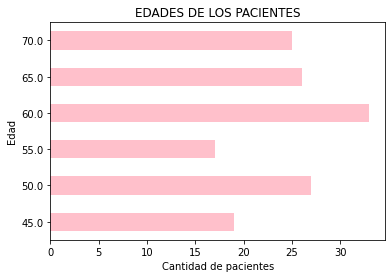

In [ ]:
edad= datosEsp["Edad"].value_counts().head(6).sort_index(ascending=True)
edad.plot.barh(color="pink")
plt.title('EDADES DE LOS PACIENTES')
plt.xlabel('Cantidad de pacientes')
plt.ylabel('Edad')

En esta gráfica de barras, podemos observar la cantidad de pacientes clasificados por edad.

Text(0.5, 1.0, 'LOS PACIENTES Y SUS ENFERMEDADES')

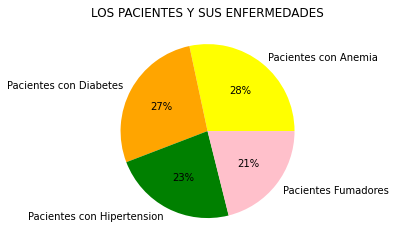

In [ ]:
cal=(a,b,c,e)
nom=('Pacientes con Anemia','Pacientes con Diabetes','Pacientes con Hipertension','Pacientes Fumadores')
colores=("yellow","orange","green","pink")

pyplot.pie(cal,colors=colores,labels=nom,autopct=("%1.f%%"))
plt.title('LOS PACIENTES Y SUS ENFERMEDADES')

Aquí se ha mostrado el porcentaje de las enfermedades entre los pacientes.

Text(0.5, 1.0, 'Relación de EDAD VS. TIEMPO, en pacientes fallecidos')

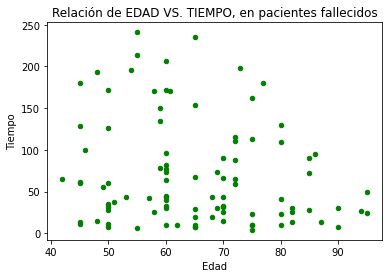

In [ ]:
datosEsp[datosEsp["Muerte"]>=1].plot.scatter(x="Edad",y="Tiempo",color="green")
plt.title("Relación de EDAD VS. TIEMPO, en pacientes fallecidos")

En esta grafiade disperción podemos observar la relación de la edad del paciente y los días en que estuvo en observación antes del fallecimiento.

**ÁRBOL DE DECISIÓN**


1. Hay que separar los datos, en datos independientes y datos dependientes.

In [ ]:
ind = ['Anemia','Diabetes','Hipertension','Sexo','Fumador']
X = datosEsp[ind] 
Y = datosEsp.Muerte

 2.   Para comprender el rendimiento del modelo, dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba es una buena estrategia.
Dividamos el conjunto de datos usando la función train_test_split (). Debe pasar 3 parámetros, características, destino y tamaño del conjunto de pruebas.

In [ ]:
X_entr, X_prue, y_entr, y_prue = train_test_split(X, Y, test_size=0.2, random_state=1) 

3.    Creamos un modelo de árbol de decisiones usando Scikit-Learn.



In [ ]:
dtc = DecisionTreeClassifier()

dtc = dtc.fit(X_entr, y_entr)

yestimada = dtc.predict(X_prue)

4.   Estimemos con qué precisión el clasificador o modelo puede predecir el tipo de cultivares.
La precisión se puede calcular comparando los valores reales del conjunto de prueba y los valores predichos.



In [ ]:
print("Precisión:",metrics.accuracy_score(y_prue, yestimada))

Precisión: 0.7333333333333333


5.   Visualización del árbol de decisión.



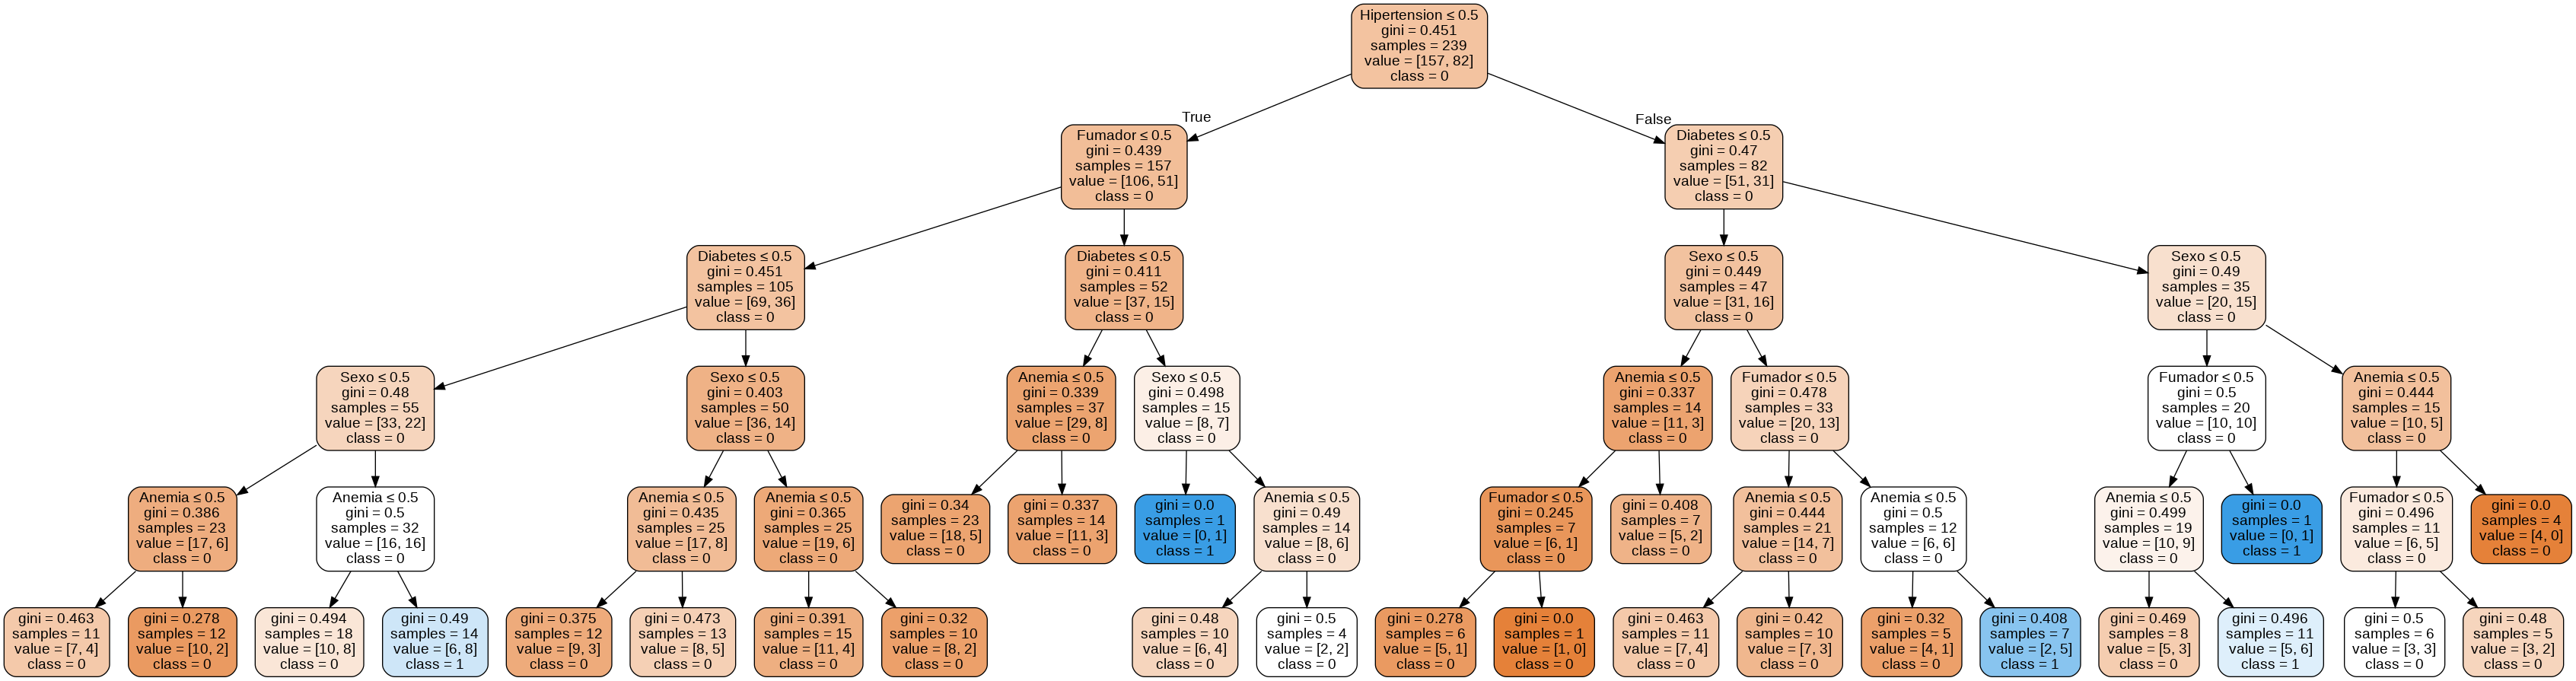

In [ ]:
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True, feature_names = ind,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('CustomerPersonalityAnalysis.png')
Image(graph.create_png())

Donde tenemos:  
- **Gini:** Es una medida de impureza de los datos usados.  
- **Samples:** Número de muestras que satisfacen las condiciones necesarias para llegar a este nodo.  
- **Value:** Cuántas muestras de cada clase llegan a este nodo.  
- **Class:** Qué clase se le asigna a las muestras que llegan a este nodo.



La interpretación de este árbol de decisión sería: Si los pacientes murieron padeciendo hipertensión, entonces es probable que hayan sido fumadores. Si por el contrario, no la padecieron, pasaríamos con otro factor probable. Si los pacientes que no padecieron de hipertension, padecen de diabetes, entonces pasamos a separar la muestra por género. Y asi sucesivamente vamos construyendo un arreglo que nos permita identificar algun patron con ciertas caracteristicas de un paciente en especifico para poder evaluarlo de mejor manera y lograr predecir su probable estado de salud con estas enfermedades.

## **Conlusión global.**  

Gracias la apoyo de la técnica del árbol, podemos realizar una mejor observación a los datos y como estos se relacionan entre si. De acuerdo a nuestras preguntas de interés, podemos concluir que encontramos que el ser fumador y padecer anemia son los factores que mas impacto tienen a la salud de los pacientes dentro de esta base, y que influyen a padecer otras enfermedades mas que si no se es fumador y no se padece anemia.  
Así, como conlusión final, encontramos estos dos ultimos factores de gran importancia, mas aparte, dentro de nuestra base se cuenta con una mayor catidad de pacientes que murieron, a los que aún siguen con vida.

## **Ideas de mejora para el resultado final.**

Nuestras ideas para mejorar aun más nuestro trabajo son las siguientes:  
- Tratar de implementar alguna otra técnica que pueda mostrar mas claramente la supervivencia.  
- Darle un mejor formato a gráficos e información para facilitar su lectura.  
- Búsqueda y realización de nuevos objetivos secundarios.